In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from itertools import combinations
from nltk import ngrams
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression,SGDClassifier,PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD


In [14]:
df = pd.read_csv(r"C:\Users\hi\Documents\NLP\FakeNews_Classifucation_Using_NLP\datasets\News_DATA.csv")
head=df.head()

In [15]:
print(head.iloc[3])  



id                                                        3
title     15 Civilians Killed In Single US Airstrike Hav...
author                                      Jessica Purkiss
text      Videos 15 Civilians Killed In Single US Airstr...
label                                                     1
Name: 3, dtype: object


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [17]:
df['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

In [18]:
df.shape

(20800, 5)

In [19]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isna().sum() /len(df) *100

id        0.0
title     0.0
author    0.0
text      0.0
label     0.0
dtype: float64

In [22]:
missing_info = {}

for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / len(df)) * 100
        missing_info[col] = round(missing_percentage, 2)

print('Columns with their missing percentages:')
for col, perc in missing_info.items():
    print(f'{col}: {perc}%')


Columns with their missing percentages:


In [23]:
df = df.dropna()

In [24]:
df.reset_index(inplace=True)
df.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [25]:
df= df.drop(['id','text','author'],axis = 1)
df.head()

,index,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


In [26]:
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))

In [27]:
df.head()

,index,title,label,title_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,14
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,9
2,2,Why the Truth Might Get You Fired,1,7
3,3,15 Civilians Killed In Single US Airstrike Hav...,1,10
4,4,Iranian woman jailed for fictional unpublished...,1,14


In [28]:
df['title_length']= df['title'].apply(lambda x: len(str(x).split()))

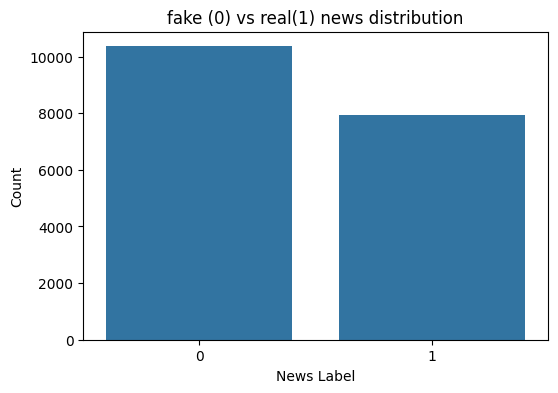

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('fake (0) vs real(1) news distribution')
plt.xlabel('News Label')
plt.ylabel('Count')
plt.show()